In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('uber.csv')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
data.shape

(200000, 9)

## Data Pre-processing

In [4]:
data.isnull().sum()
data.drop(columns='Unnamed: 0',inplace=True)

In [5]:
data = data.dropna()

In [6]:
data.drop_duplicates(inplace=True)
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
data = data[data['fare_amount']> 0]
data["pickup_datetime"] = data["pickup_datetime"].apply(lambda x:[x[0:10] for x in x.split(' ')])
data["pickup_datetime"] = data["pickup_datetime"].apply(lambda x:x[0])
data["pickup_datetime"] = pd.DatetimeIndex(data["pickup_datetime"]).year

In [8]:
data.drop(columns=['key','pickup_datetime'],inplace=True)

X = data.drop(['fare_amount'],axis=1)
y = data['fare_amount']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### Correlation

In [9]:
data.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010468,-0.008489,0.009208,-0.011250,0.010422
pickup_longitude,0.010468,1.000000,-0.816434,0.833132,-0.846449,-0.000488
pickup_latitude,-0.008489,-0.816434,1.000000,-0.774880,0.702450,-0.001500
dropoff_longitude,0.009208,0.833132,-0.774880,1.000000,-0.916971,-0.000104
dropoff_latitude,-0.011250,-0.846449,0.702450,-0.916971,1.000000,-0.000514
passenger_count,0.010422,-0.000488,-0.001500,-0.000104,-0.000514,1.000000


### Outliers Detection

<Axes: >

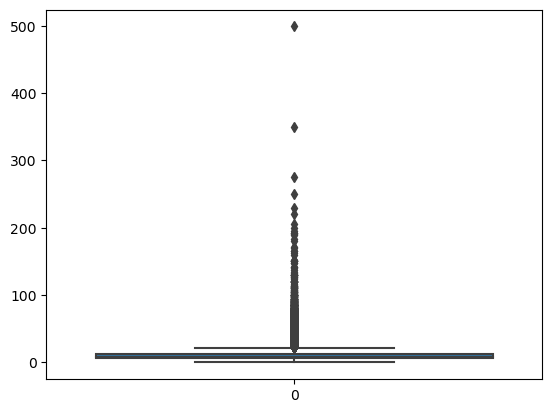

In [10]:
sns.boxplot(data['fare_amount'])

In [11]:
Q1 = np.percentile(data['fare_amount'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['fare_amount'], 75, interpolation = 'midpoint')
print(Q1,Q3)

6.0 12.5


### Outlier Treatment

In [12]:
data.drop(data[data['fare_amount'].values>=12.5].index,inplace=True)

<Axes: >

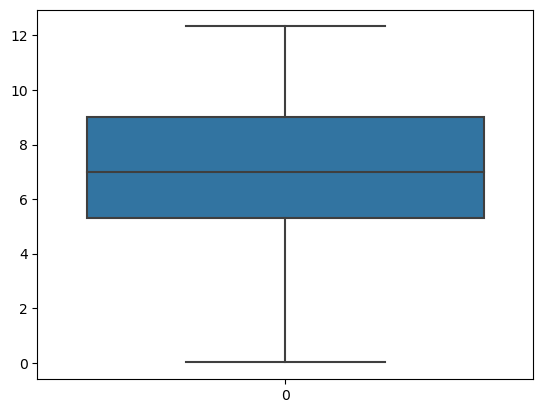

In [13]:
sns.boxplot(data['fare_amount'])

## Linear Regression

In [14]:
linear_reg_model=LinearRegression()
linear_reg_model.fit(x_train,y_train)
y_pred_linear=linear_reg_model.predict(x_test)
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("Linear Regression Model:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")

Linear Regression Model:
Linear Regression RMSE: 9.82
Linear Regression R-squared (R2): 0.00


## Random Forest

In [15]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R-squared (R2): {r2:.2f}")

print("\nRandom Forest Regression Model:")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")


Random Forest Regression Model:
Random Forest Regression RMSE: 4.93
Random Forest Regression R-squared (R2): 0.75
